## Class

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools
from scipy import sparse
from heapq import *	

In [43]:
# https://stackoverflow.com/questions/22785849/drawindowdowdowg-multiple-edges-between-two-nodes-with-networkx

def draw_networkx_edge_labels_oriented(
	G,
	pos,
	edge_labels = None,
	label_pos = 0.5,
	font_size = 10,
	font_color = "k",
	font_family = "sans-serif",
	font_weight = "normal",
	alpha = None,
	bbox = None,
	horizontalalignment = "center",
	verticalalignment = "center",
	ax = None,
	rotate = True,
	clip_on = True,
	rad = 0
):
	"""Draw edge labels.

	Parameters
	----------
	G : graph
		A networkx graph

	pos : dictionary
		A dictionary with nodes as keys and positions as values.
		Positions should be sequences of length 2.

	edge_labels : dictionary (default={})
		Edge labels in a dictionary of labels keyed by edge two-tuple.
		Only labels for the keys in the dictionary are drawn.

	label_pos : float (default=0.5)
		Position of edge label along edge (0=head, 0.5=center, 1=tail)

	font_size : int (default=10)
		Font size for text labels

	font_color : string (default='k' black)
		Font color string

	font_weight : string (default='normal')
		Font weight

	font_family : string (default='sans-serif')
		Font family

	alpha : float or None (default=None)
		The text transparency

	bbox : Matplotlib bbox, optional
		Specify text box properties (e.g. shape, color etc.) for edge labels.
		Default is {boxstyle='round', ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)}.

	horizontalalignment : string (default='center')
		Horizontal alignment {'center', 'right', 'left'}

	verticalalignment : string (default='center')
		Vertical alignment {'center', 'top', 'bottom', 'baseline', 'center_baseline'}

	ax : Matplotlib Axes object, optional
		Draw the graph in the specified Matplotlib axes.

	rotate : bool (deafult=True)
		Rotate edge labels to lie parallel to edges

	clip_on : bool (default=True)
		Turn on clipping of edge labels at axis boundaries

	Returns
	-------
	dict
		`dict` of labels keyed by edge

	Examples
	--------
	>>> G = nx.dodecahedral_graph()
	>>> edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

	Also see the NetworkX drawing examples at
	https://networkx.org/documentation/latest/auto_examples/index.html

	See Also
	--------
	draw
	draw_networkx
	draw_networkx_nodes
	draw_networkx_edges
	draw_networkx_labels
	"""
	import matplotlib.pyplot as plt
	import numpy as np

	if ax is None:
		ax = plt.gca()
	if edge_labels is None:
		labels = {(u, v): d for u, v, d in G.edges(data=True)}
	else:
		labels = edge_labels
	text_items = {}
	for (n1, n2), label in labels.items():
		(x1, y1) = pos[n1]
		(x2, y2) = pos[n2]
		(x, y) = (
			x1 * label_pos + x2 * (1.0 - label_pos),
			y1 * label_pos + y2 * (1.0 - label_pos),
		)
		pos_1 = ax.transData.transform(np.array(pos[n1]))
		pos_2 = ax.transData.transform(np.array(pos[n2]))
		linear_mid = 0.5 * pos_1 + 0.5 * pos_2
		d_pos = pos_2 - pos_1
		rotation_matrix = np.array([(0,1), (-1,0)])
		ctrl_1 = linear_mid + rad * rotation_matrix@d_pos
		ctrl_mid_1 = 0.5 * pos_1 + 0.5 * ctrl_1
		ctrl_mid_2 = 0.5 * pos_2 + 0.5 * ctrl_1
		bezier_mid = 0.5 * ctrl_mid_1 + 0.5*ctrl_mid_2
		(x, y) = ax.transData.inverted().transform(bezier_mid)

		if rotate:
			# in degrees
			angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
			# make label orientation "right-side-up"
			if angle > 90:
				angle -= 180
			if angle < -90:
				angle += 180
			# transform data coordinate angle to screen coordinate angle
			xy = np.array((x, y))
			trans_angle = ax.transData.transform_angles(
				np.array((angle,)), xy.reshape((1, 2))
			)[0]
		else:
			trans_angle = 0.0
		# use default box of white with white border
		if bbox is None:
			bbox = dict(boxstyle = "round", ec = (1.0, 1.0, 1.0), fc = (1.0, 1.0, 1.0))
		if not isinstance(label, str):
			label = str(label)  # this makes "1" and 1 labeled the same

		t = ax.text(
			x,
			y,
			label,
			size = font_size,
			color = font_color,
			family = font_family,
			weight = font_weight,
			alpha = alpha,
			horizontalalignment = horizontalalignment,
			verticalalignment = verticalalignment,
			rotation = trans_angle,
			transform = ax.transData,
			bbox = bbox,
			zorder = 1,
			clip_on = clip_on,
		)
		text_items[(n1, n2)] = t

	ax.tick_params(
		axis = "both",
		which = "both",
		bottom = False,
		left = False,
		labelbottom = False,
		labelleft = False,
	)

	return text_items

In [44]:
class map():
	def __init__(self, generate = 0):
		"""
		description:
			Inizialization of an empty map (the map() class implements
			a graph structure with dictionaries).
		syntax:
			m = map()
		"""
		self._vertices = {}
		self._coordinates = {}
		self._entities = {}
		self._end = None
		self._stamina_life = {}
		if generate != 0:
			flag = False
			while not(flag):
				self._vertices = {}
				self._coordinates = {}
				self._entities = {}
				flag = self._generate(generate)
			self._compute_end()
			self._add_entities()
			self._compute_stamina_life()

	def _insert_vertex(self, v, coord):
		""" 
		description:
			Insert a vertex v to the graph, it adds an entry corresponding 
			to v in the dictionary m._vertices and an entry with its 
			coordinates in the dictionary m._coordinates. The coordinates
			are supposed to be a tuple with lenght 2.
		syntax:
			m._insert_vertex(v, coord)	
		"""
		v = int(v)
		if v not in self._vertices:
			self._vertices[v] = {}
			self._coordinates[v] = (int(coord[0]), int(coord[1])) 
	def _remove_vertex(self, v):
		""" 
		description:
			Remove a vertex v from the graph, it removes the entry 
			corresponding to v in both the dictionaries 
			(m._vertices and m._coordinates). It also removes all the edges
			containing v.
		syntax:
			m._remove_vertex(v)	
		"""
		self._vertices.pop(v, None)
		self._coordinates.pop(v, None)
		for u in self._vertices:
			self._vertices[u].pop(v, None)
	def _insert_edge(self, edge, weight):
		""" 
		description:
			Add an edge to the graph, it assumes that edge is of type tuple.
		syntax:
			m._insert_edge(edge, weight)
		"""
		weight = float(weight)
		u, v = tuple(edge)
		u = int(u)
		v = int(v)
		(self._vertices[u])[v] = weight
	def _remove_edge(self, edge):
		""" 
		description:
			Remove an edge from the graph, it assumes that edge is of type tuple.
		syntax:
			m._remove_edge(edge, weight)
		"""
		u, v = tuple(edge)
		self._vertices[u].pop(v, None)

	def vertices(self):
		""" 
		description:
			Returns a list of tuples containing all the vertices of the graph and 
			their relative coordinates.
		syntax:
			m.vertices()
		"""
		return list((self._vertices.keys(), self._coordinates.values()))
	def edges(self):
		""" 
		description:
			Returns a list of tuples containing all the edges of the graph.
			Each tuple is a triple: (source, destination, weight).
		syntax:
			m.edges()
		"""
		_edges = []
		for u in self._vertices:
			for v in self._vertices[u].items():
				_edges.append((u, v[0], v[1]))
		return _edges
	def starting_edges(self, u):
		""" 
		description:
			Returns a list of tuples containing all the edges starting from 
			a vertex. Each tuple is a triple: (source, destination, weight).
		syntax:
			m.starting_edges(v)
		"""
		_starting_edges = []
		if u in self._vertices:
			for v in self._vertices[u].items():
				_starting_edges.append((u, v[0], v[1]))
		return _starting_edges

	def neighbours(self, v):
		""" 
		description:
			Returns a list containing the neighbours of a vertex v (tuples).
		syntax:
			m.neighbours(v)
		"""
		_neighbours = set()
		if v in self._vertices:
			_neighbours = set(self._vertices[v].keys())
			for u in self._vertices:
				if v in self._vertices[u]:
					_neighbours.add(u)
		return list(_neighbours)
	def check_adjacent(self, u, v):
		""" 
		description:
			Check whether the vertices u and v are adjacent in the graph, 
			i.e. if exists an edge from u to v. Returns a boolean value.
		syntax:
			m.check_adjacent(u, v)
		"""
		if u not in self._vertices:
			return False
		if v in self._vertices[u]:
			return True
		else:
			return False

	def _find_vertex_from_coord(self, coord):
		""" 
		description:
			Find the label of a vertex inside the graph starting from its 
			coordinates (tuple).
			If the coordinates do not corresponds to any label it returns -1.
		syntax:
			m._find_vertex_from_coord(coord)
		"""
		try:
			return list(self._coordinates.keys())[list(self._coordinates.values()).index(coord)]
		except:
			return -1
		
	def _check_link(self, start, end, verbose = False):
		""" 
		description:
			Check whether there exists a path from start to end through a DFS visit.
			Verbose mode available.
		syntax:
			m._check_link(start, end)
		"""
		if (start == end):
			return True
		n = len(self._vertices)
		explored = [False] * n
		explored[start] = True
		stack = [start]
		while stack:
			u = stack.pop()
			for v in self._vertices[u]:
				if explored[v] is False:
					if v == end:
						return True
					explored[v] = True
					stack.append(v)
		if verbose == True:
			print("error_check_link:", start, "-", end)
		return False
	
	def _generate(self, bound, verbose = False):
		""" 
		description:
			TODO
		syntax:
			m._generate(bound)
		"""
		# maximum size of the map / size of the matrix representing the game field (location)
		# 	bound * 4 + 1 = (bound * 2) * 2 + 1
		# location: matrix of the game field
		#	0: not visited nodes (new)
		#	1: occupied nodes (vertex)
		#	2: visited nodes (edge)
		location = sparse.lil_matrix(np.zeros((bound * 4 + 1, bound * 4 + 1)))
		directions = ((0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1))
		max_step = 3
		# max_vertex: number of possible vertices that could be inserted in the map divided by 4
		max_vertex = (bound * 2 + 1) ** 2 // 4
		self._insert_vertex(0, (0, 0))
		# label of the next vertex to be inserted
		next_vertex = 1
		location[2 * bound, 2 * bound] = 1
		# list of visited vertices
		visited = [0]
		for previous in visited:
			# previous: label of the current position
			prev_x, prev_y = self._coordinates[previous]
			prev_x = int(prev_x) # useless?
			prev_y = int(prev_y) # useless?
			n_neighbours = random.randint(1, 3)
			for _ in range(n_neighbours):
				flag = False
				while not(flag):
					direction = random.choice(directions)
					step = random.randint(1, max_step)
					# check of being inside the boundaries:
					#	if we are outside of the boundaries (vertically or horizontally)
					if not(prev_x + direction[0] * step + bound in np.arange(bound * 2 + 1)) or \
						not(prev_y + direction[1] * step + bound in np.arange(bound * 2 + 1)):
						continue
					# try to find the arrival vertex (actually its label) inside the map (if it is not in the map it returns -1)
					vertex = self._find_vertex_from_coord((prev_x + direction[0] * step, prev_y + direction[1] * step))
					# backward edge:
					#	if the vertex is already in the map and the chosen edge has already been inserted
					#	then no additional control is required
					if vertex != -1 and self.check_adjacent(vertex, previous):
						break
					# overflow vertices:
					#	if we reached the maximum number of vertices in the map (max_vertex) and we are trying to add a new vertex
					#	then look for a new direction and step
					if next_vertex == max_vertex and vertex == -1:
						continue
					# check correctness edge:
					flag = True
					# 	the flag is true if:
					#		the edge never passes on already taken nodes in the map (1 or 2 in location), the last half node is analyzed separately
					#		(check both integer and half nodes)
					for i in range(1, step):
						# half nodes
						flag = flag and (location[(prev_x + direction[0] * i + bound) * 2 - direction[0], \
							(prev_y + direction[1] * i + bound) * 2 - direction[1]] == 0)
						# integer nodes
						flag = flag and (location[(prev_x + direction[0] * i + bound) * 2, (prev_y + direction[1] * i + bound) * 2] == 0)
					flag = flag and (location[(prev_x + direction[0] * step + bound) * 2 - direction[0], \
							(prev_y + direction[1] * step + bound) * 2 - direction[1]] == 0)
					#	same check for the last node taking in account that it is allowed to end in an already taken node (if it is a vertex)
					#	(note: location[vertex] = 0/1, it cannot be 2)
					flag = flag and (location[(prev_x + direction[0] * step + bound) * 2, (prev_y + direction[1] * step + bound) * 2] in [0, 1])
				# there is a probability of 0.5 to generate symmetric edges (back <= prob)
				back = random.random()
				prob = 0.5
				# if location[(prev_x + direction[0] * step + bound) * 2, (prev_y + direction[1] * step + bound) * 2] == 0:
				if vertex == -1:
					self._insert_vertex(next_vertex, (prev_x + direction[0] * step, prev_y + direction[1] * step))
					self._insert_edge((previous, next_vertex), step)
					visited.append(next_vertex)
					if back <= prob:
						self._insert_edge((next_vertex, previous), step)
					next_vertex += 1
				else:
					if not(self.check_adjacent(previous, vertex)):
						self._insert_edge((previous, vertex), step)
					if back <= prob and not(self.check_adjacent(vertex, previous)):
						self._insert_edge((vertex, previous), step)
				# update of the location matrix (following the previous rules)
				for i in range(1, step):
					location[(prev_x + direction[0] * i + bound) * 2 - direction[0], \
							(prev_y + direction[1] * i + bound) * 2 - direction[1]] = 2
					location[(prev_x + direction[0] * i + bound) * 2, (prev_y + direction[1] * i + bound) * 2] = 2
				location[(prev_x + direction[0] * step + bound) * 2 - direction[0], \
							(prev_y + direction[1] * step + bound) * 2 - direction[1]] = 2
				location[(prev_x + direction[0] * step + bound) * 2, (prev_y + direction[1] * step + bound) * 2] = 1
		flag = True
		# check number of vertices is in [(bound * 2 + 1) ** 2 // 5, (bound * 2 + 1) ** 2 // 4]
		if next_vertex < (bound * 2 + 1) ** 2 // 5:
			if verbose == True:	
				print("error_generate:", next_vertex, "<", (bound * 2 + 1) ** 2 // 5)
			return False
		for u in self._vertices.keys():
			flag = flag and self._check_link(u, next_vertex - 1, verbose)
		return flag

	def _compute_end(self, start = 0):
		""" 
		description:
			Compute the end of the map through a BFS visit.
		syntax:
			m._compute_end()
		"""
		n = len(self._vertices)
		explored = [False] * n
		explored[start] = True
		queue = [start]
		while queue:
			u = queue.pop(0)
			for v in self._vertices[u]:
				if explored[v] is False:
					explored[v] = True
					queue.append(v)
		self._end = u	
	
	def _add_entities(self, num = -1):
		""" 
		description:
			Add a set of entities to the previously generated map. Default number is:
			num = len(self._vertices) // 5 + 1.
		syntax:
			m._add_entities()
		"""
		if num == -1:
			num = len(self._vertices) // 5 + 1
		full_list = list(self._vertices.keys())
		full_list.remove(0)
		full_list.remove(self._end)
		white_list = full_list.copy()
		max_power = 3
		for _ in range(num):
			if white_list:
				entity = random.choice(white_list)
				white_list.remove(entity)
				for neighbour in self.neighbours(entity):
					if neighbour in white_list: white_list.remove(neighbour)
			else:
				entity = random.choice(full_list)
			full_list.remove(entity)
			power = random.randint(1, max_power)
			self._entities[entity] = power

	# implementation: 
	# 	https://stackoverflow.com/questions/71663362/performance-improvement-for-dijkstra-algorithm-using-heaps-in-python
	# 	https://gist.github.com/kachayev/5990802
	def _dijkstra(self, start, end, blacklist = []):
		""" 
		description:
			Dijkstra algorithm implemented with heaps. It is also possible to add a blacklist containing the vertices 
			that we want to avoid (note that neither start or end should be blacklisted).
		syntax:
			m._dijkstra(start, end)
		"""
		n = len(self._vertices)
		distances = np.ones(n) * np.inf
		heap = [(0, start, ())]
		# seen = set() # full dijkstra
		seen = set(blacklist) # blacklisted vertices are avoided
		while heap:
			dist, node, path = heappop(heap)
			if node not in seen:	
				seen.add(node)
				path = path + (node, )
				if node == end:
					return (dist, list(path))
				for neighbour, weight in self._vertices[node].items():
					if neighbour not in seen:
						new_dist = dist + weight
						if new_dist < distances[neighbour]:
							distances[neighbour] = new_dist
							heappush(heap, (new_dist, neighbour, path))
		# if it is impossible to find a path from start to end
		return (np.inf, [])

	def _compute_stamina_life(self):
		""" 
		description:
			TODO
		syntax:
			m._compute_stamina_life()
		"""
		entities = list(self._entities.keys())
		full_list = entities + [0, self._end]
		pairs = {}
		for item_1 in full_list:
			for item_2 in full_list:
				if (item_1 != item_2) and (item_1 != self._end) and (item_2 != 0):
					blacklist = full_list.copy()
					blacklist.remove(item_1)
					blacklist.remove(item_2)
					pairs[(item_1, item_2)] = self._dijkstra(item_1, item_2, blacklist)
		for k in range(len(entities) + 1):
			for permutation in itertools.permutations(entities, k):
				flag = True
				life = 0
				stamina = 0
				full_permutation = [0] + list(permutation) + [self._end]
				for i in range(len(full_permutation) - 1):
					cost = pairs[(full_permutation[i], full_permutation[i + 1])][0]
					if np.isfinite(cost): 
						if i != 0:
							life += self._entities[full_permutation[i]]
						stamina += cost
					else:
						flag = False
						break
				if flag:
					if (life not in self._stamina_life) or ((life in self._stamina_life) and (stamina < self._stamina_life[life][1])):
						string_permutation = "_".join(str(x) for x in full_permutation)
						self._stamina_life[life] = (string_permutation, stamina)

	def load(self, filename):
		""" 
		description:
			Load the map from source file (filename), correctly formatted, i.e.
			first one line per vertex containing id and coordinates
			(id coord_x coord_y), then a blank line and finally one line per edge,
			composed as follows: (u v weight).
		syntax:
			m.load(filename)
		"""
		with open(filename) as file:
			lines = file.readlines()
		flag = 0
		for i in range(len(lines)):
			if lines[i] == "\n":
				flag += 1
				continue
			if flag == 0:
				v, coord_x, coord_y = lines[i].split()				
				self._insert_vertex(v, (coord_x, coord_y))
			if flag == 1:
				end = lines[i].split()
				self._end = int(end[0])
			if flag == 2:
				u, v, weight = lines[i].split()
				self._insert_edge((u, v), weight)

	def draw(self, seed = -1, path = [], filename = "",
		arc_rad = 0.25, font_size = 8, node_size = 1000, asp = 1, figure_size = 15):
		""" 
		description:
			Draw (and save) the map m and optionally a path in the map m. 
			The path is supposed to be a list of the vertices to traverse.
			E.g. path = [a, c, b, e].
			Several additional parameters can be setted:
				- arc_rad := angle of edges (in radiants)
				- font_size := font size of all the labels
				- node_size := size of the nodes
				- asp := aspect of the axis (1:1 by default)
				- figure_size := size of the figure
		syntax:
			m.draw_path(path = path, filename = filename)
		"""
		fig = plt.figure(1, figsize = (figure_size, figure_size))
		plt.gca().set_aspect("equal")
		if seed != -1:
			plt.gca().set_title("seed: " + str(seed), loc = "left", 
		    	fontdict = {"fontfamily": "monospace"})
		m_draw = nx.DiGraph()
		for e in self.edges():
			m_draw.add_edge(e[0], e[1], weight = e[2])
		edges_path = list(zip(path, path[1:]))
		nodes_colors = ["forestgreen" if node in [0, self._end] else ("lightgray" if not node in self._entities else "indianred") for node in m_draw.nodes]
		edges_colors = ["black" if not edge in edges_path else "forestgreen" for edge in m_draw.edges]
		nodes_labels = {}
		for node in m_draw.nodes:
			if node in self._entities:
				nodes_labels[node] = str(node) + "/" + str(self._entities[node])
			else:
				nodes_labels[node] = str(node)
			if node == 0:
				nodes_labels[node] = "start"
			if node == self._end:
				nodes_labels[node] = "end"
		nx.relabel_nodes(m_draw, nodes_labels, copy = False)
		weight_labels = nx.get_edge_attributes(m_draw, "weight")
		coordinates = {nodes_labels[key]: (self._coordinates[key][0], self._coordinates[key][1] * asp) for key in self._coordinates.keys()}
		nx.draw(m_draw, coordinates,
			with_labels = True, font_size = font_size, font_family = "monospace", node_size = node_size, node_color = nodes_colors, edgecolors = "black",
			connectionstyle = f"arc3, rad = {arc_rad}", edge_color = edges_colors, min_target_margin = 20, min_source_margin = 0)
		# nx.draw_networkx_edge_labels(m_draw, coordinates,
		# 	edge_labels = weight_labels, label_pos = 0.5, font_size = font_size * 0.8)
		draw_networkx_edge_labels_oriented(m_draw, coordinates,
			edge_labels = weight_labels, label_pos = 0.5, font_size = font_size * 0.8, font_family = "monospace", rad = arc_rad, verticalalignment = "center")
		if not filename == "": 
			plt.savefig("maps/" + filename + ".png", dpi = 300, bbox_inches = "tight")
			plt.show()
		else:
			return fig

## Generate map

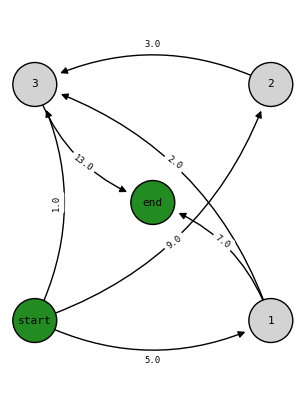

In [45]:
m = map()
map_file = "map_0"
m.load("maps/" + map_file + ".map")
m.draw(filename = map_file,
	figure_size = 5)

In [46]:
# m = map()
# map_file = "map_1"
# m.load("maps/" + map_file + ".map")
# m.draw(path = ["start", "p2", "p3", "p4", "end"], filename = map_file,
# 	figure_size = 15)

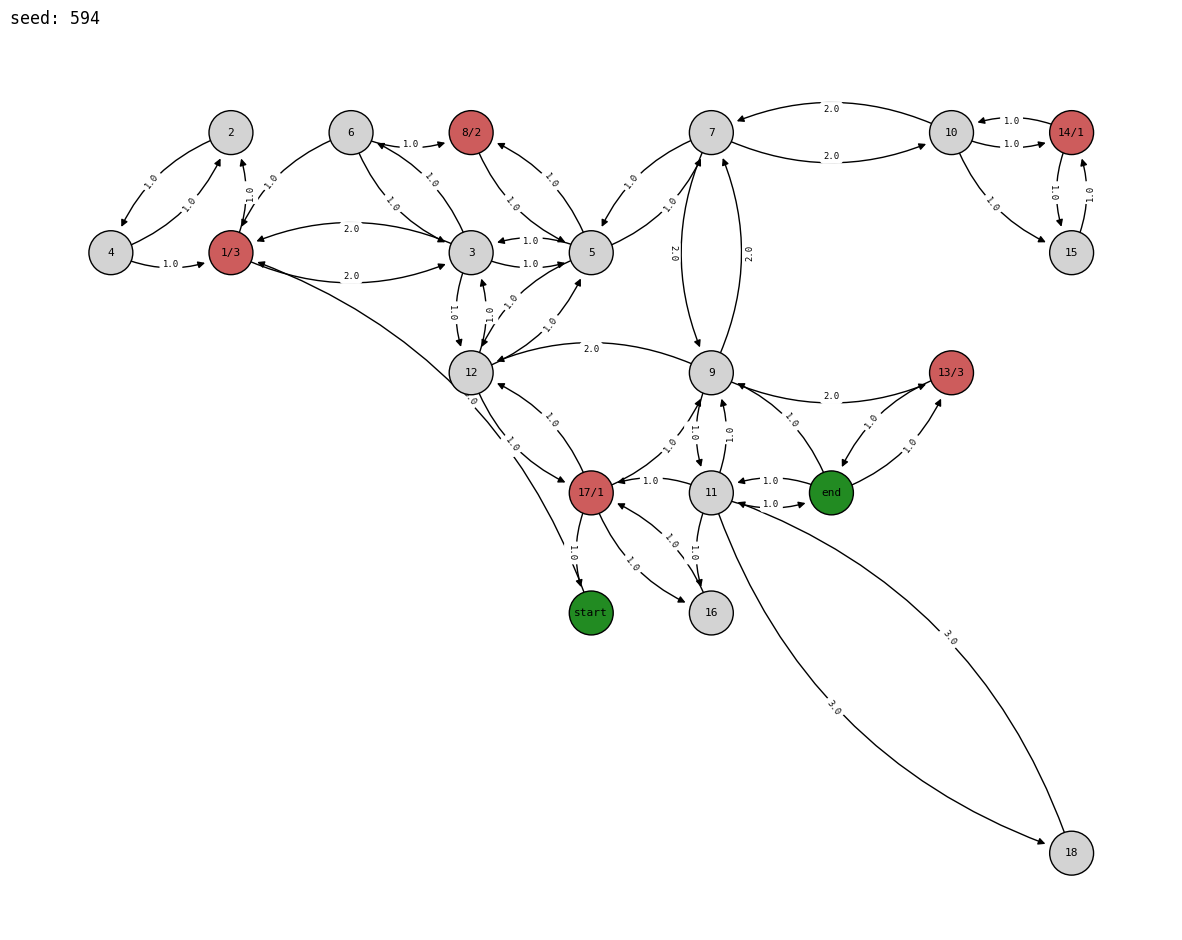

In [47]:
seed = random.randint(0, 1000)
random.seed(seed)

k = 4
m = map(generate = k)

m.draw(seed, filename = "map_gen_0",
	figure_size = 15)

## Game session

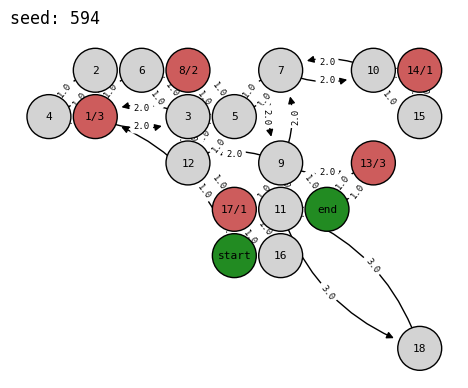

In [48]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
import time

def tk_plot(fig):
	canvas = FigureCanvasTkAgg(fig, master = window)  
	canvas.draw()
	canvas.get_tk_widget().pack()
	toolbar = NavigationToolbar2Tk(canvas, window)
	toolbar.update()
	canvas.get_tk_widget().pack()

# https://stackoverflow.com/questions/3352918/how-to-center-a-window-on-the-screen-in-tkinter
def tk_center(window):
	"""
	description:
		Centering of a tkinter window.
	syntax:
		tk_center(window)
    """
	window.update_idletasks()
	width = window.winfo_width()
	frm_width = window.winfo_rootx() - window.winfo_x()
	window_width = width + 2 * frm_width
	height = window.winfo_height()
	titlebar_height = window.winfo_rooty() - window.winfo_y()
	window_height = height + titlebar_height + frm_width
	x = window.winfo_screenwidth() // 2 - window_width // 2
	y = window.winfo_screenheight() // 2 - window_height // 2
	window.geometry("{}x{}+{}+{}".format(width, height, x, y))
	window.deiconify()

def tk_windows_setup():
	window = tk.Tk()
	window.title("")
	window.geometry("800x450")
	window.iconbitmap("tk_icon.ico")
	tk_center(window)
	return window

window = tk_windows_setup()
fig = m.draw(seed, figure_size = 15)
tk_plot(fig)
window.mainloop()

## Idee

3 gamemodes:
  - survivor: 
    - obiettivo evitare i mostri e sopravvivere
	- vita minima / stamina alta
  - balanced: 
    - obiettivo raccogliere più punti possibile ma comunque sopravvivere 
	- vita media / stamina media
  - explorer: 
    - obiettivo raccogliere più punti possibile
	- vita alta / stamina minima

Punteggio finale influenzato da numero di restart.

Possibilità di tornare indietro dopo aver incontrato un'entity se l'arco è disponibile.